# Wiadomości wstępne

## Wstęp

W niniejszej pracy zostaną omówione zagadnienia związane z algorytmami wyznaczania **MST**. Wyjaśnione zostanie pojęcie minimalnego drzewa rozpinającego (**MST**), a także opisane będą algorytmy **Kruskala** i **Prima**. Dodatkowo, przedstawione będą sposoby sprawdzenia poprawności otrzymanych wyników dla każdego z powyższych algorytmów. W dalszej części pracy omówione zostaną implementacje algorytmów związanych z tymi zagadnieniami: algorytm **Kruskala** i algorytm **Prima**. Po każdej z implementacji przedstawiony zostanie opis implementacji, analiza złożoności oraz przykład zastosowania algorytmu.

## Czym jest minimalne drzewo rozpinające(MST)?

Minimalne drzewo rozpinające(**MST**) w grafie jest drzewem, które łączy wszystkie wierzchołki grafu, przy minimalnej sumie wag krawędzi. Jest to podzbiór krawędzi grafu, który tworzy acykliczny graf spójny i pokrywa wszystkie wierzchołki, przy minimalnym koszcie.

Kryteria minimalnego drzewa rozpinającego:
* Minimalne drzewo rozpinające musi być spójne, czyli musi istnieć ścieżka łącząca każde dwa wierzchołki w drzewie.


* Suma wag krawędzi w minimalnym drzewie rozpinającym musi być jak najmniejsza spośród wszystkich możliwych drzew rozpinających graf.


* Graf może mieć więcej niż jedno minimalne drzewo rozpinające, jednak niezależnie od tego suma wag krawędzi będzie zawsze minimalna.

## Na czym polega algorytm Kruskala?

Algorytm **Kruskala** jest algorytmem, który jest wykorzystany do znajdowania minimalnego drzewa rozpinającego(**MST**) w ważonym grafie nieskierowanym. Algorytm ten wybiera kolejne krawędzie o najmniejszych wagach i dodaje je do **MST**, o ile nie powodują utworzenia cyklu. 

Algorytm **Kruskala** zawiera następujące kroki:
* Wszystkie krawędzie grafu są posortowane rosnąco według ich wag.


* Wybrana jest krawędź o najmniejszej wadze.


* Sprawdza się, czy wybrana krawędź łączy dwa różne zbiory wierzchołków. Jeśli tak, wtedy ona zostaje dodana do **MST**. 


* Zbiory wierzchołków związane z wybraną krawędzią zostają połączone.


* Kroki **2-4** są powtarzane dopóki **MST** nie zawiera **V**-1 krawędzi(gdzie **V** to liczba wierzchołków grafu) lub nie zostaną sprawdzone wszystkie krawędzie.

Złożoność czasowa algorytmu **Kruskala** wynosi:
$$\mathcal O(E*log(E))$$
Gdzie **E** to liczba krawędzi w grafie.

## Na czym polega algorytm Prima?

Algorytm **Prima** jest algorytmem, który jest wykorzystany do znajdowania minimalnego drzewa rozpinającego(**MST**) w ważonym grafie nieskierowanym. Algorytm ten zaczyna od jednego wierzchołka i stopniowo dodaje krawędzie do **MST**, tak, aby ostatecznie pokryć wszystkie wierzchołki grafu.

Algorytm **Prima** zawiera następujące kroki:
* Wybrany jest dowolny początkowy wierzchołek.


* Z kolejki priorytetowej zostaje pobrana krawędź o najmniejszej wadze.
  
  
* Jeśli krawędź łączy wierzchołek, który już należy do **MST**, z wierzchołkiem, który jeszcze nie należy, to te krawędzi zostają dodane do **MST**.


* Wybrany wierzchołek jest oznaczony jako odwiedzony.


* Każda krawędź wychodząca z wybranego wierzchołka, która łączy nieodwiedzony wierzchołek, jest dodana do kolejki priorytetowej.


* Kroki **2-5** są powtarzane dopóki **MST** nie zawiera **V**-1 krawędzi(gdzie **V** to liczba wierzchołków grafu) lub nie zostaną sprawdzone wszystkie krawędzie.


Złożoność czasowa algorytmu **Prima** wynosi:
$$\mathcal O(E*log(V))$$
Gdzie **E** to liczba krawędzi, a **V** to liczba wierzchołków w grafie.

## Na czym głównie polega różnica między algorytmem **Prima** a algorytmem **Kruskala**?

## W jaki sposób można sprawdzić poprawność wyników algorytmu Prima oraz algorytmu Kruskala?

Weryfikacja poprawności wyników wyżej wskazanych algorytmów polega głównie na sprawdzeniu, czy drzewo spełnia podstawowe warunki drzewa rozpinającego, czy drzewo zawiera wszystkie wierzchołki oraz czy suma wag jest minimalna. Jeśli wszystkie te warunki są spełnione, można uznać, że odpowiedź algorytmu Prima jest poprawna.

# Implementacje algorytmów

## Implementacja algorytmu Kruskala

### Funkcje pomocniczne

Niżej jest podana funkcja, która przyjmuje dwa argumenty: tablica pierwszych wierzchołków **src** oraz indeks wierzchołku **i**. Celem funkcji jest znalezienie początkowego wierzchołku. Funkcja zwraca indeks początkowego wierzchołku.

In [86]:
def getRoot(src: list[int], i: int) -> int:
    if src[i] != i:
        src[i] = getRoot(src, src[i])
    return src[i]

Niżej jest podana funkcja, która przyjmuje cztery argumenty: tablica pierwszych wierzchołków **src**, tablica rankingu **rank**, indeks pierwszego początkowego wierzchołku **x**, oraz indeks drugiego początkowego wierzchołku **y**. Celem funkcji jest łączenie dwóch zbiorów na podstawie podanych rankingów w celu utworzenia większego zbioru.

In [87]:
def combineSubsets(src: list[int], rank: list[int], x: int, y: int) -> None:
    if rank[x] < rank[y]:
        src[x] = y
    elif rank[x] > rank[y]:
        src[y] = x
    else:
        src[y] = x
        rank[x] += 1

Niżej jest podana funkcja, która implementuje algorytm **Kruskala**. Ona przyjmuje dwa argumenty: tablica wierzchołków i wag **src** oraz liczbę wierzchołków **V**. Celem funkcji jest generowanie połączeń zgodnie z podanymi zasadami. Funkcja zwraca dwuwymiarową tablicę, która reprezentuje wygenerowane połączenia.

In [138]:
def kruskal(src: list[list[int]], V: int) -> list[list[int]]:
    result = []
    i = 0
    e = 0
        
    connections = sorted(src[:], key=lambda item: item[2])

    parents = []
    ranks = []

    for node in range(V):
        parents.append(node)
        ranks.append(0)
            
    while e < V - 1:
        u, v, w = connections[i]

        i += 1
 
        x = getRoot(parents, u)
        y = getRoot(parents, v)

        if x != y:
            e += 1
            result.append([u, v, w])
            combineSubsets(parents, ranks, x, y)
            
    return result

### Opis implementacji

Najpierw tworzona jest tablica wyjściowa **result**, która będzie przechowywać krawędzie minimalnego drzewa rozpinającego(**MST**). Dalej odbywa się inicjalizacja zmiennych wewnętrznych. Następnie odbywa się sortowanie kopii tablicy wejściowej **src** według podanych wag każdej krawędzi. Posortowana lista nazywa się **connections**. Dalej twoerzone są puste tablice **parents** i **ranks**. Tablica **parents** będzie przechowywać informację o przynależności każdego wierzchołka. Tablica **ranks** będzie przechowywać informację o rankingu drzew dla każdego wierzchołka. Następnie odbywa się iteracja przez podaną liczbę wierzchołków **V** i każdy zostaje dodany do tablicy **parents**, a rankingi są równe **0**. Dalej odbywa się proces generacji **MST**, który będzie trwać, dopóki nie zostanie zbudowane **MST** o **V-1** krawędziach. W każdej iteracji, brana jest krawędź z tablicy **connections** o indeksie **i** i zostaje rozpakowana do zmiennych **u**(pierwszy wierzchołek), **v**(drugi wierzchołek), **w**(waga).
Przy pomocy funkcji **getRoot** znajdowane są reprezentanty zbiorów, do których należą wierzchołki **u** i **v**. Zwracane wartości **x** i **y** są indeksami tych reprezentantów. Jeżeli wartości zmiennych **x** i **y** są różne, oznacza to, że wierzchołki **u** i **v** należą do różnych zbiorów i możemy je połączyć. Następna krawędź jest dodana to tablicy wyjściowej. Wartość zmiennej **e** jest inkrementowana o **1**, ponieważ dodana jest kolejna krawędź do **MST**. Dalej jest wywoływana funkcja **combineSubsets** w celu połączenia zbiorów o indeksach **x** i **y** w jedno większe drzewo.

### Analiza złożoności

Początkowo odbywa się sortowanie krawędzi. Jeśli **src** zawiera **V** wierzchołków i **E** krawędzi, to złożoność czasowa sortowania wynosi:
$$\mathcal O(E*log(E))$$
Kolejna operacja initcjalizacji zmiennych wewnętrznych ma złożoność czasową:
$$\mathcal O(V)$$
Dalej w pętli, która wykonuje się maksymalnie **V-1** razy odbywają się takie operacje, jak pobranie korzenia zbioru porównanie, dodanie krawędzi do wyniku oraz scalenie zbiorów zostaną wykonane. Z tego powodu złożoność czasowa powyższej operacji wynosi:
$$\mathcal O(E*\alpha(V))$$
Gdzie **E** to liczba krawędzi. Ostatecznie złożoność czasowa algorytmu **Kruskala** zależy od sortowania krawędzi. Dlatego złożoność czasowa algorytmu **Kruskala** wynosi:
$$\mathcal O(E*log(E))$$

### Przykłady wykorzystania

Poniżej jest podany przykład wykorzystania, który ...

In [122]:
src = [[0, 1, 10],
    [0, 2, 6],
    [0, 3, 5],
    [1, 3, 15],
    [2, 3, 4],
    [0, 4, 2],
    [3, 6, 7],
    [2, 7, 4],
    [5, 7, 8]]
result = kruskal(src, 8)

print(result)

[[0, 4, 2], [2, 3, 4], [2, 7, 4], [0, 3, 5], [3, 6, 7], [5, 7, 8], [0, 1, 10]]


#### Sprawdzenie poprawności wyniku algorytmu Kruskala

Sprawdzenie poprawności odbywa się przy pomocy wbudowanej w środowisko **SageMath** biblioteki, która zawiera implementację algorytmu **Kruskala**.

In [116]:
from sage.graphs.spanning_tree import filter_kruskal

validation_src = {}

for c in src:
    if validation_src.get(c[0]) is None:
        validation_src[c[0]] = [c[1]]
    else:
        validation_src[c[0]] += [c[1]]
g = Graph(validation_src)

for c in src:
    g.set_edge_label(c[0], c[1], c[2])

valid_result = filter_kruskal(g, check=True)
for v in result:
    found = False
    for q in valid_result:
        if v[0] == q[0] and v[1] == q[1] and v[2] == q[2]:
            found = True
    assert found == True

#### Początkowa reprezentacja geometryczna

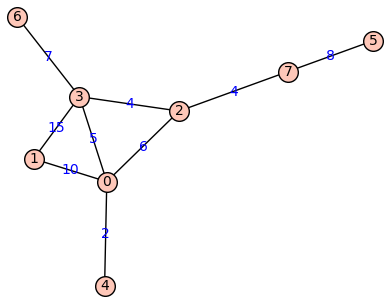

In [121]:
from sage.graphs.graph_plot import GraphPlot
options = {
    'vertex_size': 200,
    'vertex_labels': True,
    'edge_style': 'solid',
    'edge_colors': None,
    'edge_labels': True,
    'iterations': 50,
    'tree_orientation': 'down',
    'heights': None,
    'graph_border': False,
    'talk': False,
    'color_by_label': False,
    'partition': None,
    'dist': .075,
    'max_dist': 1.5,
    'loop_size': .075,
    'save_pos': True,
    'edge_labels_background': 'transparent'}

graph_src = {}
labels_src = {}

for c in src:
    if graph_src.get(c[0]) is None:
        graph_src[c[0]] = [c[1]]
    else:
        graph_src[c[0]] += [c[1]]


g = Graph(graph_src)

edge_colors = []
for c in src:
    edge_colors.append('red')
    g.set_edge_label(c[0], c[1], c[2])

GP = GraphPlot(g, options)
GP.show()

#### Ostateczna reprezentacja geometryczna

## Implementacja algorytmu Prima

Niżej jest podana funkcja, która implementuje algorytm **Prima**. Ona przyjmuje dwa argumenty: tablica wierzchołków i wag **src** oraz liczbę wierzchołków **V**. Celem funkcji jest generowanie połączeń zgodnie z podanymi zasadami. Funkcja zwraca dwuwymiarową tablicę, która reprezentuje wygenerowane połączenia.

In [104]:
def prim(src: list[list[int]], V: int) -> list[list[int]]:
    result = []

    G = [[0] * V for _ in range(V)]

    for c in src:
        G[c[0]][c[1]] = c[2]
        G[c[1]][c[0]] = c[2]

    selected = [False] * V
    selected[0] = True

    q = 0
    while q < V - 1:
        minimum = float('inf')
        x = 0
        y = 0
        for i in range(V):
            if selected[i]:
                for j in range(V):
                    if not selected[j] and G[i][j]:
                        if minimum > G[i][j]:
                            minimum = G[i][j]
                            x = i
                            y = j
        result.append([x, y, G[x][y]])
        selected[y] = True
        q += 1
    return result

### Opis implementacji

Najpierw tworzona jest tablica wyjściowa **result**, która będzie przechowywać krawędzie minimalnego drzewa rozpinającego(**MST**). Następnie tworzona jest macierz sąsiedztwa **G**, wypełniona zerami, o rozmiarze:
$$\mathcal V^2$$ 
Gdzie **V** to podany argument, który reprezentuje liczbę wierzchołków. Następnie dla każdej krawędzi, w podanej tablice wejściowej **src**, wartość w macierzy **G** odpowiadająca odpowiednim wierzchołkom jest ustawiana na wagę tej krawędzi. Macierz **G** jest symetryczna, ponieważ graf jest nieskierowany. Dalej odbywa się inicjalizacja zmiennych wewnętrznych. Tworzona jest tablica **selected**, która przechowuje informację o tym, które wierzchołki zostały już wybrane. Na początku wszystkie wartości w **selected** są ustawione na **False**, a wierzchołek o indeksie **0** jest ustawiony na **True**, oznaczając, że został wybrany jako pierwszy wierzchołek **MST**. Następnie, odbywa się iteracja , która wykonuje się dopóki nie zostanie wybrane **V-1** krawędzi. Głównym celem tej operacji jest znajdowanie krawędzi o najmniejszej wadze. Dalej odbywa się iteracja przez wszystkie wybrane wierzchołki, oznaczone jako **selected[i] == True** i sprawdza się ich sąsiadów, którzy nie zostały jeszcze wybrani, czyli **selected[j] == False** i mają istniejącą krawędź między nimi, czyli jeżeli wartość w macierzy **G[i][j]** jest większa niż **0**. Jeśli waga tej krawędzi jest mniejsza od dotychczasowej minimalnej wagi **minimum**, wartość tej zmiennej się aktualizuje oraz zapamiętuje się indeksy wierzchołków tej krawędzi **x** i **y**. Po znalezieniu krawędzi o najmniejszej wadze, ona zostaje dodana do tablicy wyjściowej **result**. Następnie wybrany wierzchołek **y** jest oznaczony jako **True** w tablice **selected**, co oznacza, że jest włączony do **MST**. Po zakończeniu głównej iteracji zwraca się tablica **result**, która zawiera minimalne drzewo rozpinające(**MST**).

### Analiza złożoności

Początkowo odbywa się tworzenie macierzy sąsiedztwa, które polega na utworzeniu macierzy dwuwymiarowej **G** na podstawie podanej tablicy połączeń **src**. Złożoność czasowa tej operacji wynosi:
$$\mathcal O(V)$$
Gdzie **V** to podana liczba wierzchołków.
Dalej, po inicjalizacji zmiennych(złożoność czasowa jest stała), odbywa się znajdowanie najmniejszej krawędzi. Ten proces polega na iteracji przez wszystkie wierzchołki i ich sąsiadujące wierzchołki w celu znalezienia najmniejszej krawędzi. Złożoność czasowa tej operacji wynosi:
$$\mathcal O(V^2)$$
Ostatecznie złożoność czasowa algorytmu **Prima** wynosi:
$$\mathcal O(V^3)$$

### Przykłady wykorzystania

In [49]:
src = [[0, 1, 10],
    [0, 2, 6],
    [0, 3, 5],
    [1, 3, 15],
    [2, 3, 4]]
result = prim(src, 4)

print(result)

[[0, 3, 5], [3, 2, 4], [0, 1, 10]]


#### Sprawdzenie poprawności wyniku algorytmu Kruskala

Sprawdzenie poprawności odbywa się przy pomocy wbudowanej w środowisko **SageMath** biblioteki, która zawiera implementację algorytmu **Kruskala**.

In [137]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2, {'weight': 10}),
                  (1, 3, {'weight': 6}),
                  (1, 4, {'weight': 5}),
                  (2, 3, {'weight': 15}),
                  (2, 4, {'weight': 4})])
G.prim_minimum_spanning_tree()

AttributeError: 'Graph' object has no attribute 'prim_minimum_spanning_tree'

#### Początkowa reprezentacja geometryczna

{'vertex_size': 200, 'vertex_labels': True, 'edge_style': 'solid', 'edge_colors': ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red'], 'edge_labels': True, 'heights': None, 'color_by_label': False, 'partition': None, 'save_pos': True, 'edge_labels_background': 'transparent'}


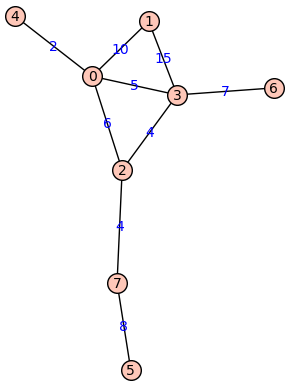

In [136]:
from sage.graphs.graph_plot import GraphPlot
options = {
    'vertex_size': 200,
    'vertex_labels': True,
    'edge_style': 'solid',
    'edge_colors': None,
    'edge_labels': True,
    'heights': None,
    'color_by_label': False,
    'partition': None,
    'save_pos': True,
    'edge_labels_background': 'transparent'}

graph_src = {}
labels_src = {}

for c in src:
    if graph_src.get(c[0]) is None:
        graph_src[c[0]] = [c[1]]
    else:
        graph_src[c[0]] += [c[1]]


g = Graph(graph_src)

edge_colors = []
for c in src:
    edge_colors.append('red')
    g.set_edge_label(c[0], c[1], c[2])

options['edge_colors'] = edge_colors
print(options)
GP = GraphPlot(g, options)
GP.show()

#### Ostateczna reprezentacja geometryczna

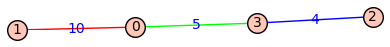

In [76]:
graph_src = {}
labels_src = {}

for c in result:
    if graph_src.get(c[0]) is None:
        graph_src[c[0]] = [c[1]]
    else:
        graph_src[c[0]] += [c[1]]

g = Graph(graph_src)

for c in src:
    g.set_edge_label(c[0], c[1], c[2])
GP = GraphPlot(g, options)
GP.show()

# Podsumowanie

W niniejszej pracy zostaną omówione zagadnienia związane z algorytmami wyznaczania **MST**. Wyjaśnione zostanie pojęcie minimalnego drzewa rozpinającego (**MST**), a także opisane będą algorytmy **Kruskala** i **Prima**. Dodatkowo, przedstawione będą sposoby sprawdzenia poprawności otrzymanych wyników dla każdego z powyższych algorytmów. W dalszej części pracy omówione zostaną implementacje algorytmów związanych z tymi zagadnieniami: algorytm **Kruskala** i algorytm **Prima**. Po każdej z implementacji przedstawiony zostanie opis implementacji, analiza złożoności oraz przykład zastosowania algorytmu. Na podstawie przeanalizowanej złożoności czasowej, można stwierdzić, że wydajność przedstawionych algorytmów głównie zależy od struktury podanego grafu. W taki sposób algorytm **Prima** jest bardziej wydajny dla grafów, gdzie liczba krawędzi jest zbliżona do liczby wierzchołków kwadratowej. Natychmiast algorytm **Kruskala** jest bardziej wydajny w przypadku grafów, gdzie liczba krawędzi jest znacznie mniejsza od liczby wierzchołków kwadratowej. Warto podkreślić, że, chociaż zarówno algorytm **Kruskala** jak i algorytm **Prima** zwracają poprawne minimalne drzewo rozpinające(**MST**), kolejność krawędzi może się różnić.

# Wykorzystane źródła

- https://en.wikipedia.org/wiki/Kruskal%27s_algorithm
- https://pl.wikipedia.org/wiki/Algorytm_Prima
- https://eduinf.waw.pl/inf/alg/001_search/0141.php